In [2]:
import numpy as np
import pandas as pd

In [3]:
base = pd.read_csv('C:/Users/thais/OneDrive/Documentos/Diretório theuzas/regressão/rigidez.csv',
                   sep=';', encoding='iso-8859-1')

In [4]:
base = base.rename(columns={'Lo': 'CompInicial', 
                            'L': 'CompFinal',
                             'x': 'Deformacao',
                              'K': 'Rigidez' })

In [5]:
base.dtypes

cargas           int64
forca          float64
CompInicial    float64
CompFinal      float64
Deformacao     float64
Rigidez        float64
dtype: object

In [6]:
base2 = base.drop(columns=['CompInicial'])

In [7]:
base.isnull().sum()

cargas         0
forca          0
CompInicial    0
CompFinal      1
Deformacao     1
Rigidez        1
dtype: int64

In [8]:
base2.describe()

,cargas,forca,CompFinal,Deformacao,Rigidez
count,30.000000,30.000000,29.000000,29.000000,29.000000
mean,15.500000,1.519000,139.050690,0.112050,30.823448
std,8.803408,0.978103,343.474372,0.343475,5.840459
min,1.000000,0.100000,29.900000,0.002900,1.640000
25%,8.250000,0.690000,50.000000,0.023000,30.770000
50%,15.500000,1.450000,76.400000,0.049400,31.300000
75%,22.750000,2.235000,99.740000,0.072740,32.860000
max,30.000000,3.200000,1918.000000,1.891000,36.340000


In [9]:
base2['Deformacao'].fillna(base2['Deformacao'].mean(), inplace=True)
base2['Rigidez'].fillna(base2['Rigidez'].mean(), inplace=True)
base2['CompFinal'].fillna(base2['CompFinal'].mean(), inplace=True)

In [10]:
import plotly.express as pte

In [11]:
bp = pte.box(base2, 'forca')
bp.show()

bp1 = pte.box(base2, 'Deformacao')
bp1.show()

bp2 = pte.box(base2, 'Rigidez')
bp2.show()

In [12]:
base2.drop(28, inplace=True)

# correlação linear 

primeiro iremos montar gráficos cruzados com variáveis para verificar se faz sentido testar a correlação linear


In [13]:
import matplotlib.pyplot as plt

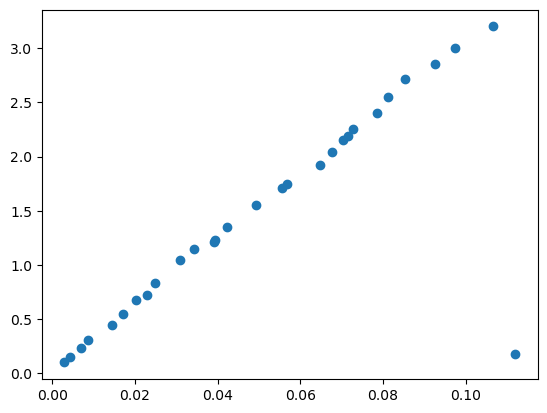

In [14]:
plt.scatter(base2.Deformacao, base2.forca)

seaborn já faz a combinação nos graficos com todas as variaveis da base


c:\Users\thais\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\thais\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\thais\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\thais\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\thais\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a

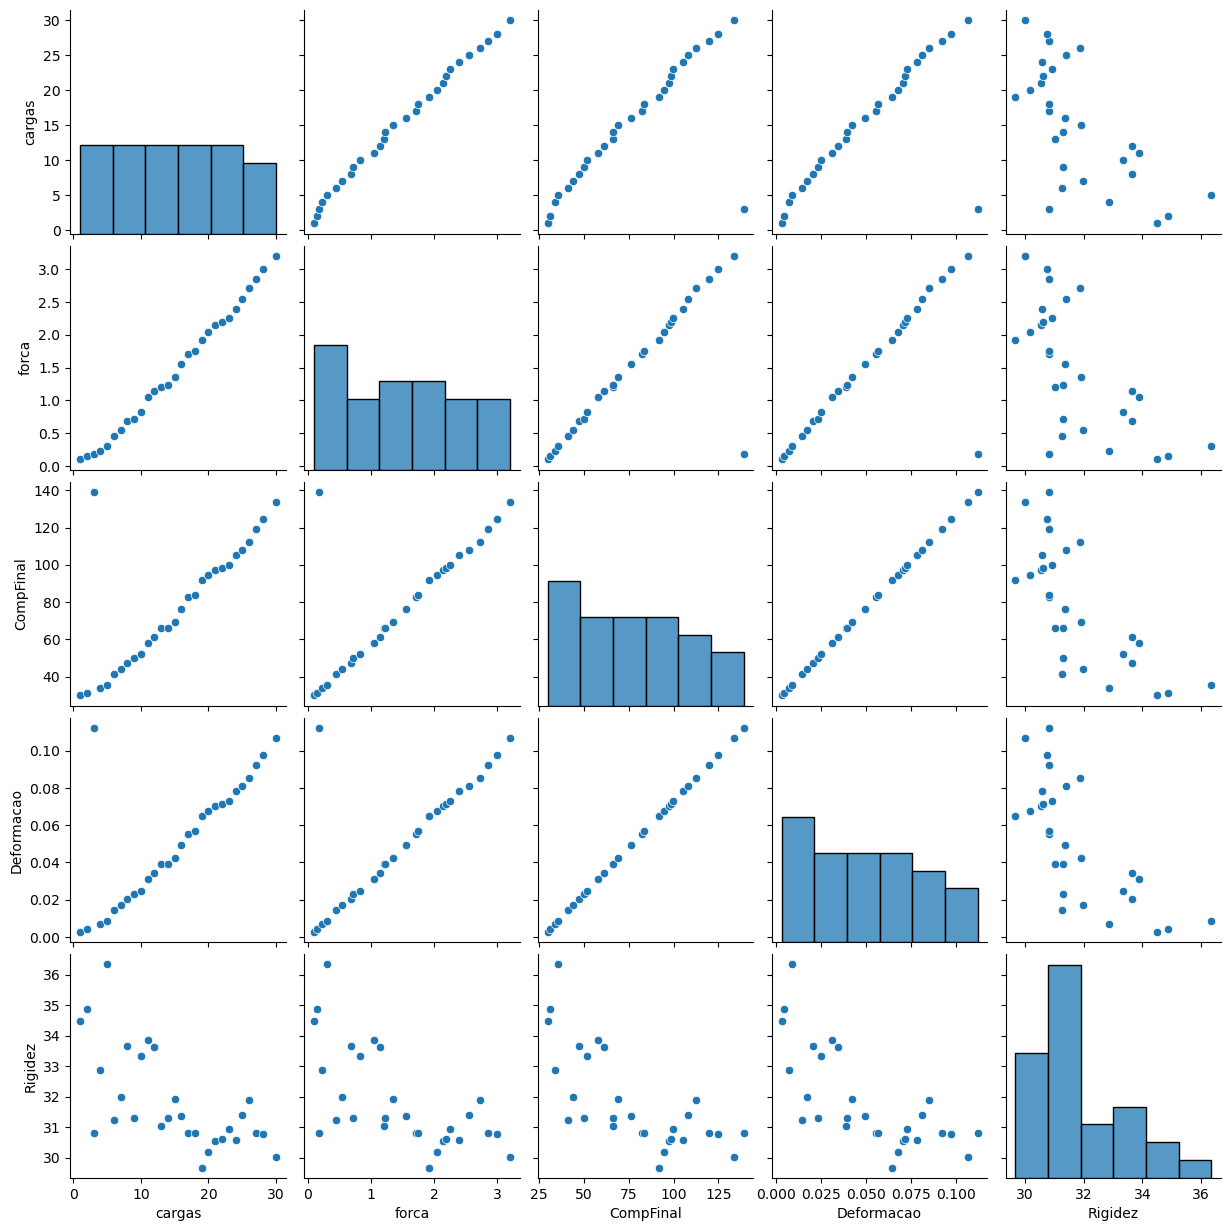

In [15]:
import seaborn as sns
sns.pairplot(base2);

antes de analisar a correlação, é necessário avaliar a normalidade.

é normal: usa o coeficiente de pearson 

não é normal: sperman ou kendall (kendall usa quando tem poucas observações - 30 linhas)

# analise de normalidade

In [16]:
import scipy.stats as stats

# vamos usar o QQ-Plot para analisar a normalidade

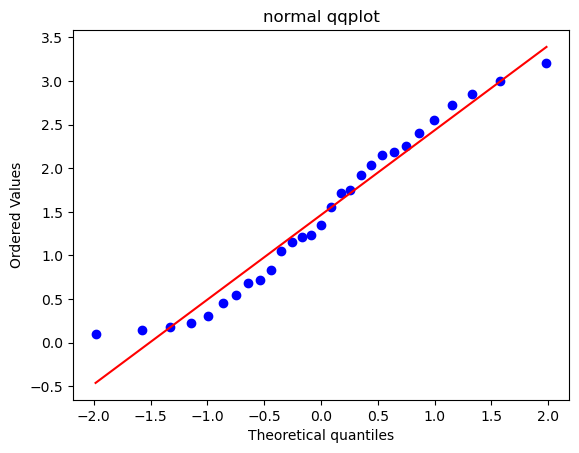

In [17]:
stats.probplot(base2['forca'], dist='norm', plot=plt)
plt.title('normal qqplot')
plt.show()

para ser normal perfeita, os valores tem que estar em cima da reta vermelha. Podemos ver que a grande maioria está em cima.

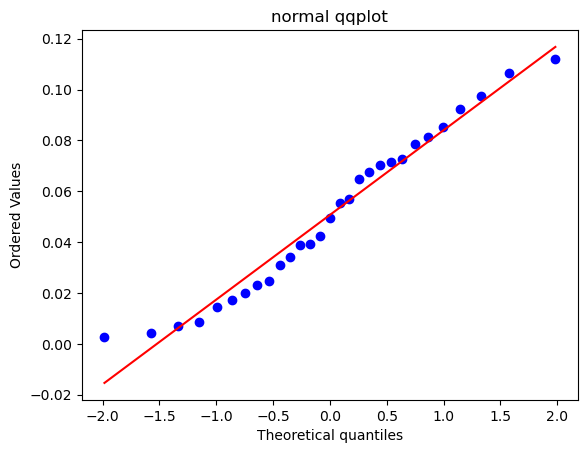

In [18]:
stats.probplot(base2['Deformacao'], dist='norm', plot=plt)
plt.title('normal qqplot')
plt.show()

# testando estatisticamente

# teste de shapiro wilk
   distribuição normal se p-valor > 0,05
    
   distribuição não normal se p-valor < 0,05

In [19]:
stats.shapiro(base2.forca)

ShapiroResult(statistic=0.9500337839126587, pvalue=0.183413565158844)

In [20]:
stats.shapiro(base2.Deformacao)

ShapiroResult(statistic=0.955998420715332, pvalue=0.26104268431663513)

# temos outros testes tbm

In [21]:
import statsmodels
from statsmodels.stats.diagnostic import lilliefors

# É a mesma lógica de hipóteses

In [22]:
import statsmodels.stats
import statsmodels.stats.diagnostic


statsmodels.stats.diagnostic.lilliefors(base2.forca, dist='norm')

(0.0942372454326656, 0.7277132638691427)

In [23]:
import statsmodels.stats
import statsmodels.stats.diagnostic


statsmodels.stats.diagnostic.lilliefors(base2.Deformacao, dist='norm')

(0.09703260858604729, 0.684384215549321)

# analise de correlação

Pearson = distribuição normal

Spearman = distribuição não normal 

Kendall = distribuição não normal e número pequeno de amostras

# se p-valor > 0 não existe correlação linear

# se p-valor < 0 existe correlação linear

In [24]:
# Pearson 

stats.pearsonr(base2.Deformacao, base2.forca)

# Existe correlação linear. O primeiro valor é o número do teste (R, é o valor de -1 a 1 e mostra correlação 
# positiva ou negativa, nesse caso, é positiva)

PearsonRResult(statistic=0.8038725787144505, pvalue=1.503935118457819e-07)

In [25]:
stats.spearmanr(base2.Deformacao, base2.forca)

# mesma caoisa para o spearmanr

SignificanceResult(statistic=0.827093596059113, pvalue=3.1785259791408475e-08)

In [26]:
stats.kendalltau(base2.Deformacao, base2.forca)

# mesma coisa para kendall

SignificanceResult(statistic=0.8719211822660098, pvalue=2.662227657369936e-16)

Aqui  eu farei uma tabela cruzada para a corrlação para todas as variáveis 

In [27]:
correlacoes = base2.corr(method='pearson')
correlacoes

,cargas,forca,CompFinal,Deformacao,Rigidez
cargas,1.000000,0.997232,0.795051,0.795059,-0.664596
forca,0.997232,1.000000,0.803864,0.803873,-0.652548
CompFinal,0.795051,0.803864,1.000000,1.000000,-0.718644
Deformacao,0.795059,0.803873,1.000000,1.000000,-0.718705
Rigidez,-0.664596,-0.652548,-0.718644,-0.718705,1.000000


também posso criar um mapa de calor:

<Axes: >

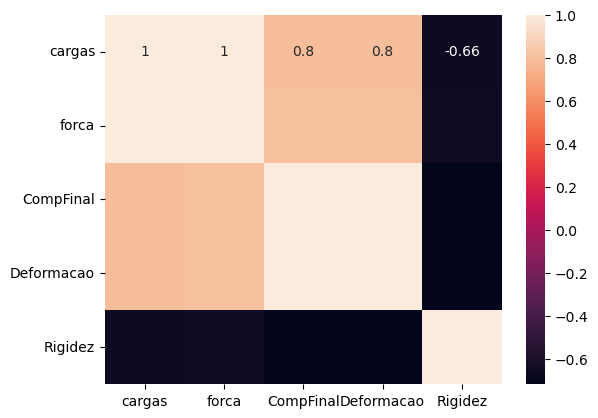

In [28]:
plt.figure 
sns.heatmap(correlacoes, annot=True)

_____
# regressão linear com stats model

In [29]:
import statsmodels.formula.api as smf 
import statsmodels.stats.api as sms 

In [30]:
# criação do modelo 

regressao = smf.ols('forca ~ Deformacao', data = base2).fit() # chamamos o pacote (smf), depois o método do mqo (ols), 
# e depois a variável dependende seguido pela independente ( separado por ~)


após isso, é necessário fazer testes de normalidade nos resíduos para verificar se eles atendem alguns pressupostos

1) normalidade nos resíduos

2) homocedasticidade

3) outliers nos resíduos

In [31]:
residuos = regressao.resid
residuos

0    -0.242305
1    -0.225168
2    -2.724409
3    -0.208546
4    -0.163756
5    -0.162248
6    -0.127973
7    -0.068393
8    -0.094119
9    -0.028718
10    0.048095
11    0.072980
12    0.020308
13    0.033266
14    0.082847
15    0.116186
16    0.132999
17    0.142484
18    0.127044
19    0.178972
20    0.223247
21    0.237426
22    0.268319
23    0.283113
24    0.369735
25    0.443494
26    0.404486
27    0.437120
29    0.423513
dtype: float64

In [32]:
# teste de shapiro ->   p-valor > 0,05 é normal (nesse caso não é normal mas seguiremos adiante)

stats.shapiro(residuos)

ShapiroResult(statistic=0.5275372266769409, pvalue=1.5297004551939608e-08)

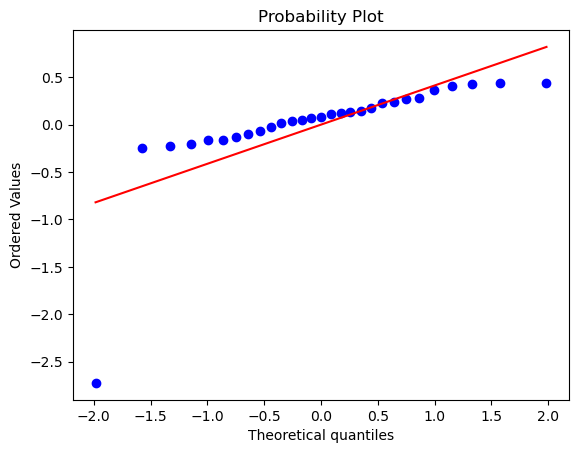

In [33]:
stats.probplot(residuos, dist='norm', plot=plt)
plt.show()

# testar a homocedasticidade 

variação constante

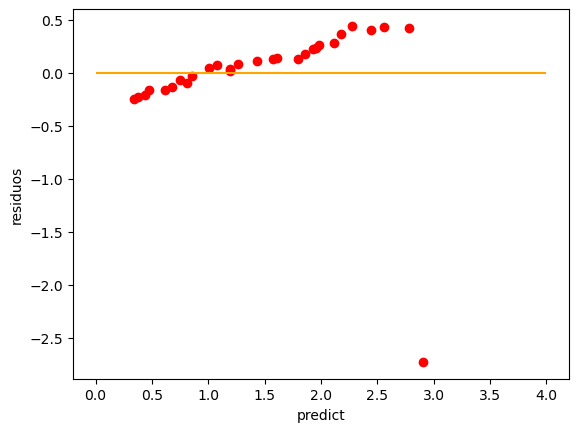

In [34]:
# pelo gráfico 

plt.scatter(y=residuos, x=regressao.predict(), color='red')
plt.hlines(y=0, xmin=0, xmax=4, color='orange')
plt.ylabel('residuos')
plt.xlabel('predict')
plt.show()

para ser homocedasticos, os valores deveriam estar distribuidos dentro de um retangulo invisivel.

para ter certeza, iremos usar o teste de Breusch-Pagan 

p-valor > 0,05 é homocedastico

In [35]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [36]:
sms.het_breuschpagan(regressao.resid, regressao.model.exog) # os argumentos são: primeiro os residuos depois o modelo de reg

# estatistica do teste é o primeiro 
# p-valor o segundo

# o modelo não passou no teste


(4.467561823234996,
 0.034544251977893514,
 4.916925433917517,
 0.035201131065061855)

In [37]:
# veriricar outliers nos resíduos - tem que estar entre -3 e 3

outliers = regressao.outlier_test()

In [38]:
outliers.max()

student_resid    0.801044
unadj_p          0.972023
bonf(p)          1.000000
dtype: float64

In [39]:
outliers.min()  # menor que 3

student_resid   -7.301598e+01
unadj_p          1.287006e-31
bonf(p)          3.732316e-30
dtype: float64

partindo do pressuposto que o modelo foi aprovado, iremos avaliar a regressão:

In [40]:
print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                  forca   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     49.32
Date:                Wed, 12 Jun 2024   Prob (F-statistic):           1.50e-07
Time:                        09:20:48   Log-Likelihood:                -24.022
No. Observations:                  29   AIC:                             52.04
Df Residuals:                      27   BIC:                             54.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2742      0.200      1.370      0.1

aqui, temos que ver o teste de hipótese para os parametros. 

p-valor <0 o parametro é significante 

In [41]:
# vendo somente os parametros

regressao.params

Intercept      0.274232
Deformacao    23.473311
dtype: float64

In [42]:
base2.head()

,cargas,forca,CompFinal,Deformacao,Rigidez
0,1,0.10,29.90000,0.00290,34.480000
1,2,0.15,31.30000,0.00430,34.880000
2,3,0.18,139.05069,0.11205,30.823448
3,4,0.23,34.00000,0.00700,32.860000
4,5,0.31,35.53000,0.00850,36.340000


In [43]:
regressao.predict() # ta horrivel hihihihihihi

array([0.34230499, 0.37516763, 2.90440877, 0.43854557, 0.47375553,
       0.61224807, 0.67797334, 0.74839327, 0.81411854, 0.85871783,
       1.00190503, 1.07701962, 1.18969151, 1.1967335 , 1.26715344,
       1.43381394, 1.57700114, 1.60751644, 1.7929556 , 1.8610282 ,
       1.92675347, 1.95257411, 1.98168102, 2.11688729, 2.18026522,
       2.2765058 , 2.44551364, 2.56288019, 2.77648732])

# grafico do real x previsto

C:\Users\thais\AppData\Local\Temp\ipykernel_16616\1576431232.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



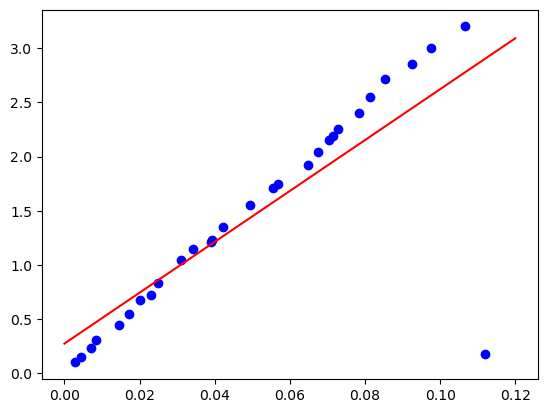

In [44]:
plt.scatter(y=base2.forca, x=base2.Deformacao, color='blue')
X_plot = np.linspace(0,0.12)
plt.plot(X_plot, X_plot*regressao.params[1] + regressao.params[0], color='r')
plt.show()

______

# Agora SKLEARN 

In [46]:
# primeiro é necessário separar as variáveis dependentes e independentes 

x = base2.iloc[:, 3].values  # do lado esquerdo são as linhas (dois pontos significa todos) e no lado esquerdo as colunas (3 é o indice da coluna deformacao)
y = base2.iloc[:,1].values # 1 é a coluna força



In [47]:
np.corrcoef(x,y) # correlações

array([[1.        , 0.80387258],
       [0.80387258, 1.        ]])

In [48]:
# antes de prosseguir, é necessário transformar as variaveis em matriz

x = x.reshape(-1,1)

In [51]:
from sklearn.linear_model import LinearRegression
reg2 = LinearRegression()
reg2.fit(x,y)

LinearRegression()

In [52]:
reg2.intercept_


0.27423239278903644

In [53]:
reg2.coef_

array([23.47331074])

In [56]:
reg2.score(x,y)

0.6462111228090204

In [57]:
prev = reg2.predict(x)
prev

array([0.34230499, 0.37516763, 2.90440877, 0.43854557, 0.47375553,
       0.61224807, 0.67797334, 0.74839327, 0.81411854, 0.85871783,
       1.00190503, 1.07701962, 1.18969151, 1.1967335 , 1.26715344,
       1.43381394, 1.57700114, 1.60751644, 1.7929556 , 1.8610282 ,
       1.92675347, 1.95257411, 1.98168102, 2.11688729, 2.18026522,
       2.2765058 , 2.44551364, 2.56288019, 2.77648732])